In [1]:
import pandas as pd

import tensorflow as tf

from sklearn.preprocessing import StandardScaler

2022-04-16 13:11:49.321699: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


STONKS ONLY GO UP

1. Apple (AAPL)
2. Microsoft (MSFT)
3. Texas Instruments (TXN)
4. Sony (SONY)
5. Google (GOOG)
6. Tesla (TSLA)
7. Coke (KO)
8. Chipotle (CMG)
9. NVIDIA (NVDA)
10. AMD (AMD)

Maybes
1. Facebook (FB)
2. Intel (INTC)

Stable Stocks
1. S&P 500 (VOO or SPY)
2. NASDAQ 100


In [2]:
# This portion limits that amount of VRAM that is allotted from the graphics car,     ,sdfdfierweasdfkjlkjwerd
gpus = tf.config.list_physical_devices('GPU')

if gpus:

  # Restrict TensorFlow to only allocate 2GB of memory on the first GPU

  try:

    tf.config.set_logical_device_configuration(

        gpus[0],

        [tf.config.LogicalDeviceConfiguration(memory_limit=2048)])

    logical_gpus = tf.config.list_logical_devices('GPU')

    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

  except RuntimeError as e:

    # Virtual devices must be set before GPUs have been initialized

    print(e)

1 Physical GPUs, 1 Logical GPUs


2022-04-16 13:11:50.196550: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-16 13:11:50.197141: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-16 13:11:50.217112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-16 13:11:50.217193: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.65GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-04-16 13:11:50.217207: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-16 13:11:50.218185: I tensorflow/stream_executor/platform

In [3]:
# Load data here
import pandas as pd
import numpy as np

df = pd.read_csv('MSFT.csv')
print(df.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061252  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063439   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064533   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.062892    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061799    47894400


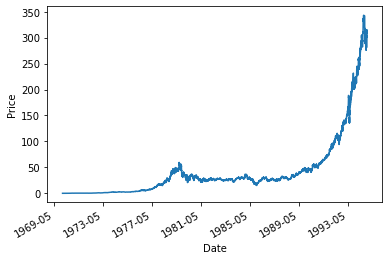

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

fmt_half_year = mdates.MonthLocator(interval=48)
ax.xaxis.set_major_locator(fmt_half_year)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.autofmt_xdate()

plt.plot(df.Date, df.Close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [5]:
'''
  Drops the date column from the dataframe
'''

df['Date']= pd.to_datetime(df['Date'])
split_date = pd.datetime(2015, 1, 1)
training_dataframe = df.loc[df['Date'] <= split_date]
testing_dataframe = df.loc[df['Date'] > split_date]

training_dataframe = training_dataframe[['Close']]
testing_dataframe = testing_dataframe[['Close']]
print(training_dataframe.head())
print(testing_dataframe.head())

      Close
0  0.097222
1  0.100694
2  0.102431
3  0.099826
4  0.098090
          Close
7263  46.759998
7264  46.330002
7265  45.650002
7266  46.230000
7267  47.590000


/tmp/ipykernel_332904/3149830778.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2015, 1, 1)


In [6]:
''' 
Preparing data for LSTM

The data frame above needs to be reloaded before this cell can run 
'''

training_dataframe = training_dataframe.astype('float64')


'''
The following method assigns the close of the previous day as the opening of the next day.

The create_dataset method was retrieved from: 
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
'''

def create_dataset(n_X, look_back=1):
  data_X, data_y = [], []
  for i in range(len(n_X) - look_back):
    a = n_X[i:(i+look_back),0]
    data_X.append(a)
    data_y.append(n_X[i + look_back, 0])
  return np.array(data_X), np.array(data_y)

look_back = 1
train_X, train_y = create_dataset(training_dataframe.values, look_back)
test_X, test_y = create_dataset(testing_dataframe.values, look_back)
print(train_X)

print(train_X.shape)
train_X = tf.reshape(train_X, [train_X.shape[0],1, train_X.shape[1]])
test_X = tf.reshape(test_X, [test_X.shape[0],1,test_X.shape[1]])

NameError: name 'new_df' is not defined

In [252]:
# Creating the model and loading the model

inputs = tf.random.normal([32, 10, 8])
lstm = tf.keras.layers.LSTM(4)
output = lstm(inputs)
print(output.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(40, activation='tanh', return_sequences=True))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

(32, 4)


In [253]:
# Fitting the model

model.fit(train_X, train_y, epochs=100)


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 8232.0053
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 7213.0552
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 6711.8409
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 6191.3716
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 5896.4976
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 4969.7486
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 5188.5925
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 4509.1009
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 4653.2071
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 4447.5902
Epoch 11/100
176/176 [==============================] - 0s 2ms/step - loss: 4353.9703
Epoch 12/100
176/176 [==============================] - 0s 2ms/

If we include too much data, the model will be overfitted not be able to predict current day prices well!

Just from the graphs, it looks as though the model we made is generally optimistic regarding the prices.

[]

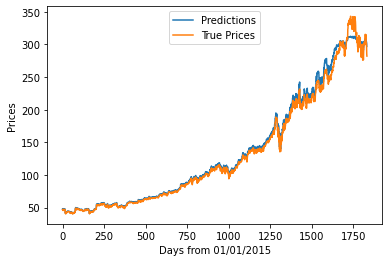

In [262]:
testing_predictions = model.predict(test_X)
testing_predictions = tf.reshape(testing_predictions, [1, 1, len(testing_predictions)])
true_vals = testing_dataframe[['Close']].values.flatten()
plt.plot(testing_predictions[0][0], label="Predictions")
plt.plot(true_vals, label="True Prices")
plt.ylabel('Prices')
plt.xlabel('Days from 01/01/2015')
plt.legend(loc='upper center')
plt.plot()

In [260]:
from sklearn.metrics import mean_squared_error

mean_squared_error(true_vals, testing_predictions[0][0])

ValueError: Found input variables with inconsistent numbers of samples: [1833, 1832]

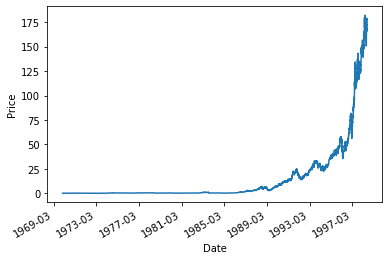

In [197]:
aapl_dataframe = pd.read_csv('AAPL.csv')

fig, ax = plt.subplots()

fmt_half_year = mdates.MonthLocator(interval=48)
ax.xaxis.set_major_locator(fmt_half_year)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.autofmt_xdate()

plt.plot(aapl_dataframe.Date, aapl_dataframe.Close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [170]:
aapl_date = aapl_dataframe.Date
print(aapl_date.values)

['1980-12-12' '1980-12-15' '1980-12-16' ... '2022-04-08' '2022-04-11'
 '2022-04-12']


In [171]:
aapl_dataframe = aapl_dataframe.drop(['Date'], axis=1)

In [172]:

aapl_dataframe = aapl_dataframe.astype('float64')

aapl_dataset = aapl_dataframe[['Open', 'Close']]

aapl_train_x, aapl_train_y = create_dataset(aapl_dataset.values, look_back)

aapl_train_X = tf.reshape(train_X, [len(train_X),1, 1])
print(aapl_train_X.shape)
print(aapl_train_X)
print(aapl_train_y)

(9095, 1, 1)
tf.Tensor(
[[[8.85420000e-02]]

 [[9.72220000e-02]]

 [[1.00694000e-01]]

 ...

 [[2.96660004e+02]]

 [[3.00440002e+02]]

 [[2.91790009e+02]]], shape=(9095, 1, 1), dtype=float64)
[1.22210000e-01 1.13281000e-01 1.15513000e-01 ... 1.71779999e+02
 1.68710007e+02 1.68020004e+02]


[ 0.27659225  0.2815113   0.28348732 ... 83.22425    83.22425
 83.22425   ]


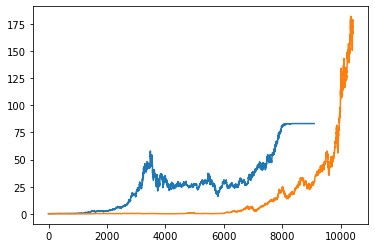

In [173]:
aapl_predict = model.predict(aapl_train_X)
aapl_predict = np.array(tf.reshape(aapl_predict, [1, 1,len(aapl_predict)]))
print(aapl_predict[0][0])


plt.plot(aapl_predict[0][0])
plt.plot(aapl_dataset['Close'].values)
plt.show()